## 일표본 검정 (One Sample T-Test)
![일표본검정](./1samp.jpg)

- 단일 모집단에서 관심이 있는 연속형 변수의 평균값을 특정 기준값과 비교

- H0 귀무가설 : 모평균의 값은 특정 값 O
- H1 대립가설 : 모평균의 값은 특정 값 X

In [1]:
import scipy.stats as stats
import pandas as pd

cats = pd.read_csv('./data/cats.csv', encoding='utf-8')
cats.head() # 성별 / 몸무게 / 길이

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [2]:
# 고양이의 몸무게가 2.6kg 인지를 검정

# 정규성 검정
mu = 2.6
stats.shapiro(cats.Bwt)

# p-Value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택 → 정규성 불만족

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [3]:
# (정규성 불만족) 일 표본 검정 - 윌콕슨의 부호 순위 검정

stats.wilcoxon(cats.Bwt - mu, alternative = 'two-sided')

# p-Value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택
# → 고양이의 평균 몸무게는 2.6kg이라고 할 수 없음

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

## 대응 표본 T-검정 (Paired Sample T-Test)
![대응표본T검정](./paired.jpg)

- 단일 모집단에 대하여 어떤 처리를 했을 경우, 처리 전후에 따른 평균의 차이를 비교하는 검정
- 표본 내 개체에 대해 두 번의 측정 (같은 집단이므로 등분산성을 만족)
- 모집단의 관측값이 정규성을 만족해야 한다는 가정 존재

- H0 귀무가설 : 두 모평균 사이의 차이 X
- H1 대립가설 : 두 모평균 사이의 차이 O

In [4]:
data = {'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4], # 수면제 복용 전
        'after':[8, 4, 5, 6, 2, 3, 6, 8, 6, 5]}  # 수면제 복용 후
df = pd.DataFrame(data)
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [5]:
stats.shapiro(df.before), stats.shapiro(df.after)

# p-Value가 0.05를 초과하므로 정규성 만족

(ShapiroResult(statistic=0.9644595384597778, pvalue=0.8352707624435425),
 ShapiroResult(statistic=0.9456837177276611, pvalue=0.6177994012832642))

In [6]:
# (정규성 만족) 대응 표본 T-검정

stats.ttest_rel(df.after, df.before, alternative='greater')

# p-Value가 0.05 이하이므로 귀무가설을 기각하고 대립가설 채택 
# → 두 모평균 사이 차이가 있음
# 통계적으로 영양제 복용 후 수면시간이 늘었다고 볼 수 있음

Ttest_relResult(statistic=4.743416490252569, pvalue=0.0005269356285082765)

## 독립 표본 T-검정 (Independent Sample T-Test)
![독립표본T검정](./ind.jpg)

- 두 개의 독립된 모집단의 평균을 비교하는 검정으로, 모집단, 모수, 표본이 모두 두 개씩 존재(등분산성 가정 필요)
- 가정
  - 정규성
  - 등분산성


- H0 귀무가설 : 두 모평균 사이의 차이 X
- H1 대립가설 : 두 모평균 사이의 차이 O

In [7]:
# 등분산 검정

f_cat = cats.loc[cats.Sex == 'F', 'Bwt']
m_cat = cats.loc[cats.Sex == 'M', 'Bwt']

stats.levene(f_cat, m_cat)

# p-Value가 0.05 이하이므로 등분산성 불만족

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [8]:
# (등분산 불만족) 독립 표본 T-검정

stats.ttest_ind(f_cat, m_cat, equal_var = False)

# p-Value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택
# → 두 모집단의 평균은 차이 O

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

## 분산분석 (ANOVA)

- 두 개 이상의 다수 집단 간 평균 비교 검정
- 독립변수는 범주형, 종속변수는 연속형

|구분|명칭|독립변수 개수|종속변수 개수|
|:---:|:---:|:---:|:---:|
|단일변량 분산분석|일원배치 분산분석|1개|1개|
|단일변량 분산분석|이원배치 분산분석|2개|1개|
|단일변량 분산분석|다원배치 분산분석|3개 이상|1개|
|다변량 분산분석|MANOVA|1개 이상|2개 이상|


### 일원배치 분산분석 (One-way ANOVA)
![일원배치](./oneway_anova.jpg)
- 단계 : 가설 수립 → 정규성 검정 → 등분산 검정 → F-Oneway 검정 → 사후검정
- 반응값에 대한 하나의 범주형 변수의 영향을 알아보기 위한 검증
- 모집단 수의 제한이 없고, 각 표본의 수도 같을 필요 X
- F-Statistics

|요인|제곱합|자유도|평균제곱|F-Value|P|
|:---:|:---:|:---:|:---:|:---:|:---:|
|집단 간|SSB|집단 수 -1|집단 간 제곱합 ÷ 자유도|집단 간 평균제곱 ÷ 집단 내 평균제곱|-|
|집단 내|SSW|자료 수 - 집단 수|집단 내 제곱합 ÷ 자유도|집단 간 평균제곱 ÷ 집단 내 평균제곱|-|
|합계|TSS|자료 수 - 1|-|집단 간 평균제곱 ÷ 집단 내 평균제곱|-|

- 가정
  - 집단의 측정치는 서로 독립적
  - 정규성
  - 등분산

- H0 귀무가설 : k개 집단 간 모평균 차이 X (평균이 동일)
- H1 대립가설 : k개 집단 간 모평균 차이 O

#### 사후검정
- 분산분석의 결과 귀무가설이 기각되어 적어도 한 집단에서 평균의 차이가 있음이 통계적으로 증명되었을 경우(p-Value < 0.05) 어떤 집단들에 대해 평균의 차이가 존재하는지를 알아보기 위한 검정
- 던칸의 MRT, 피셔의 LSD, 튜키의 HSD 등

In [9]:
# 종별로 꽃받침 폭의 평균의 차이 정도를 확인
iris_df = pd.read_csv('./data/iris.csv')
iris_df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [10]:
print(iris_df.target.unique())
print(iris_df.target.value_counts())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: target, dtype: int64


In [11]:
setosa = iris_df[iris_df['target'] == 'Iris-setosa']['sepal width']
versicolor = iris_df[iris_df['target'] == 'Iris-versicolor']['sepal width']
virginica = iris_df[iris_df['target'] == 'Iris-virginica']['sepal width']

In [12]:
# 정규성 검정

print(stats.shapiro(setosa))
print(stats.shapiro(versicolor))
print(stats.shapiro(virginica))

# p-Value가 모두 0.05 이상이므로 귀무가설을 채택 → 정규성 만족

ShapiroResult(statistic=0.968691885471344, pvalue=0.20465604960918427)
ShapiroResult(statistic=0.9741330742835999, pvalue=0.33798879384994507)
ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)


In [13]:
# 등분산 검정

stats.levene(setosa, versicolor, virginica)

# p-Value가 0.05 이상이므로 귀무가설을 채택 → 등분산성 만족

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [14]:
# 일원배치 분산분석

stats.f_oneway(setosa, versicolor, virginica)

# p-Value가 0.05 이하이므로 귀무가설을 기각하고 대립가설을 채택
# → 종에 따라 꽃받침 폭 평균의 차이 O

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

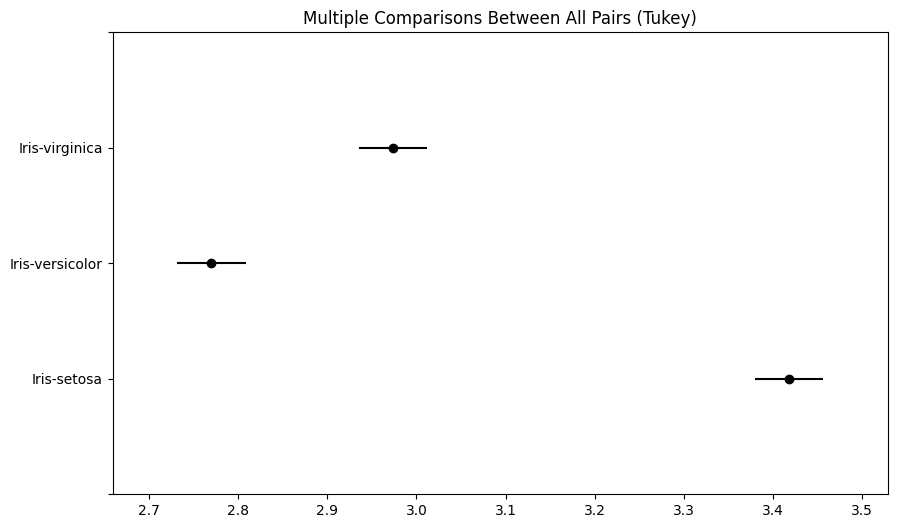

In [15]:
# 대립가설을 채택했으므로 사후검정 진행

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

mc = MultiComparison(data = iris_df['sepal width'], groups = iris_df['target'])
tukey_hsd = mc.tukeyhsd(alpha=0.5)

fig = tukey_hsd.plot_simultaneous()

In [16]:
tukey_hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.7246,-0.5714,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.5206,-0.3674,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.1274,0.2806,True


In [17]:
# 수정된 p-Value (p-adj)가 모두 0.05 이하이므로 각각의 비교에 대한 귀무가설을 모두 기각
# 사후검정 귀무가설 : 집단들 간 평균 동일
# 사후검정 대립가설 : 집단들 간 평균 X

### 이원배치 분산분석 (Two-way ANOVA)
![이원배치](./twoway.jpg)
- 단계 : 가설 수립 → 정규성 검정 → 등분산 검정 → F-Oneway 검정 → 사후검정
- 연속형 반응값(종속변수)에 대한 두 개의 범주형 독립변수의 영향을 알아보기 위한 검증
- 교호작용(두 독립변수의 범주들의 조합으로 인해 반응변수에 미치는 특별한 영향)에 대한 검증이 반드시 필요
- F-Statistics

|요인|제곱합|자유도|평균제곱|F-Value|
|:---:|:---:|:---:|:---:|:---:|
|요인 A|SS_a|I-1|제곱합 ÷ 자유도|F_a = MS_a / MSE|
|요인 B|SS_b|J-1|제곱합 ÷ 자유도|F_b = MS_b / MSE|
|상호작용|SS_a*b*|(I-1)(J-1)|집단 내 제곱합 ÷ 자유도|F_ab = MS_ab / MSE|
|오차|SSE|IJ(n-1)|MSE = SSE / IJ(n-1)|-|
|전체|SST|IJn-1|-|-|

  - SST : Sum of square Total - 총 제곱합
  - SSA : 요인 A 수준 평균값들 사이의 제곱합
  - SSB : 요인 B 수준 평균값들 사이의 제곱합
  - SSE : Sum of square Error - 오차 제곱합
  - SSW : Sum of square Within factor - 집단 내 변화량
  - I : 요인 A의 수준의 수
  - J : 요인 B의 수준의 수

- 가정
  - 집단의 측정치는 서로 독립적이며 정규 분포를 따름
  - 등분산


- H0 귀무가설 : a와 b 변수의 상호작용 X (교호작용 X) 
- H0 귀무가설 : a 변수에 따른 종속변수 값의 차이 X
- H0 귀무가설 : b 변수에 따른 종속변수 값의 차이 X
- H1 대립가설 : a와 b 변수의 상호작용 O (교호작용 O) 
- H1 대립가설 : a 변수에 따른 종속변수 값의 차이 O
- H1 대립가설 : b 변수에 따른 종속변수 값의 차이 O

In [18]:
mtcars = pd.read_csv('./data/mtcars.csv')
mtcars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [19]:
mtcars = mtcars[['mpg', 'am', 'cyl']]
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   am      32 non-null     int64  
 2   cyl     32 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 896.0 bytes


In [20]:
# am, cyl 변수는 범주형 변수 (독립변수)
mtcars.am.unique(), mtcars.cyl.unique()

# am : 변속기 종류
# cyl : 실린더 개수

(array([1, 0], dtype=int64), array([6, 4, 8], dtype=int64))

In [21]:
# mpg 변수는 연속형 변수 (종속변수)
mtcars.mpg.unique()

# mpg : 주행거리

array([21. , 22.8, 21.4, 18.7, 18.1, 14.3, 24.4, 19.2, 17.8, 16.4, 17.3,
       15.2, 10.4, 14.7, 32.4, 30.4, 33.9, 21.5, 15.5, 13.3, 27.3, 26. ,
       15.8, 19.7, 15. ])

#### 가설수립

- H0 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 없다.   # 교호작용 검정
- H0 : 변속기 종류에 따른 주행거리의 차이는 없다.               # 주효과 검정 1
- H0 : 실린더 개수에 따른 주행거리의 차이는 없다.               # 주효과 검정 2
- H1 : 변속기 종류와 실린더 개수 간에는 상호작용 효과가 있다.   # 교호작용 검정
- H1 : 변속기 종류에 따른 주행거리의 차이는 있다.               # 주효과 검정 1
- H1 : 실린더 개수에 따른 주행거리의 차이는 있다.               # 주효과 검정 2

In [23]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [24]:
formula = 'mpg ~ C(am) + C(cyl) + C(am):C(cyl)'
model = ols(formula, mtcars).fit()
anova_table = anova_lm(model, typ=2)
anova_table

# cyl과 am 변수 간 상호작용에 대한 검정은 p-Value가 0.05 이상이므로
# 귀무가설을 채택 → 상호작용은 효과가 없다.
# am 변수에 따른 mpg의 차이에 대한 검정은 p-Value가 0.05 이상이므로
# 귀무가설을 채택 → 변속기 종류에 따른 주행거리의 차이는 없다.
# cyl 변수에 따른 mpg의 차이에 대한 검정은 p-Value가 0.05 이하이므로 귀무가설을
# 기각하고 대립가설을 채택 → 실린더 개수에 따른 주행거리의 차이는 있다.

,sum_sq,df,F,PR(>F)
C(am),36.766919,1.0,3.998759,5.608373e-02
C(cyl),456.400921,2.0,24.819011,9.354735e-07
C(am):C(cyl),25.436511,2.0,1.383233,2.686140e-01
Residual,239.059167,26.0,NaN,NaN


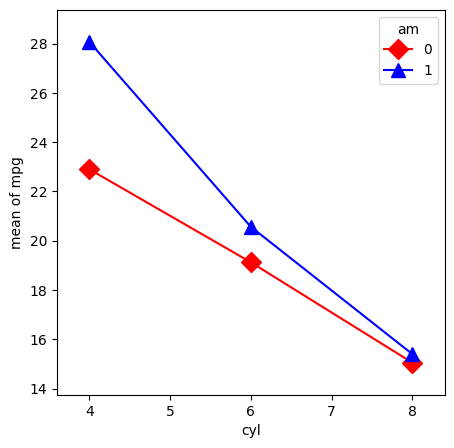

In [25]:
# 교호작용 효과 시각화

from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))
fig = interaction_plot(mtcars.cyl, mtcars.am, mtcars.mpg,
                       colors=['r', 'b'], markers=['D', '^'],
                       ms=10, ax=ax) # X1, X2, Y의 순서로 입력

# 일반적으로 상호작용 그래프에 교점이 존재할 경우 상호작용이 존재한다고 해석 가능

## 교차분석(카이제곱 검정) (Chi-square Test)
- 단계 : 적합성 검정 → 독립성 검정 → 동질성 검정
- 데이터에서 각 범주에 따른 결과변수의 분포를 설명하거나, 범주형 변수가 두 개 이상인 경우 두 변수가 상관이 있는지를 검정

|독립변수|종속변수|분석방법|
|:---:|:---:|:---:|
|범주형|연속형|t-검정 / 분산분석(ANOVA)|
|범주형|범주형|분할표 분석 / 카이제곱 검정 / 피셔의 정확도 검정|
|연속형|범주형|로지스틱 회귀 분석|


#### 교차분석의 개념
- 교차표를 통해 각 셀의 관찰빈도와 기대빈도 간 차이를 검정하는 기법
  - 관찰빈도 : 자료로부터 얻은 빈도분포
  - 기대빈도 : 두 변수가 독립일 때 이론적으로 기대할 수 있는 빈도분포
 
|구분|환자군|대조군|전체|
|:---:|:---:|:---:|:---:|
|과체중|25|15|40 (40%)|
|정상체중|10|50|60 (60%)|
|전체|35 (35%)|65 (65%)|100 (100%)|
  
- 환자군이면서 과체중인 사람의 관찰빈도는 25명이지만, 기대빈도는 전체 환자군 35 * 전체 과체중 비율 0.4 = 14명
- 이런 관찰빈도와 기대빈도의 차이가 유의한 차이가 있는지를 χ제곱 통계량을 이용하여 검정
- 각 범주의 기대빈도는 5 이상이어야 함

### 적합성 검정
- 각 범주에 따른 데이터의 빈도분포가 이론적으로 기대하는 분포를 따르는지를 검정
- 예 : 주사위를 굴렸을 때, 각 주사위의 값이 1/6의 확률이 맞는지를 검정


- **scipy.stats.chisquare(f_obs, f_exp=None, ddof=0, axis=0)**
  - f_bos : 관칠빈도값 (pd.value_counts() 값 입력)
  - f_exp : 각 카테고리의 기대 빈도, default로 가능성이 동일하다고 가정
  - ddof : p-Value에 대한 자유도 조정값 (k - 1 - ddof) - 주사위를 예로 들면 k는 6, 카이제곱 검정에서의 자유도는 k-1

In [26]:
titanic = pd.read_csv('./data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   adult_male   891 non-null    bool   
 10  embark_town  889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 70.6+ KB


In [27]:
titanic_t = titanic[titanic['survived'] == 1]
table = titanic_t[['sex']].value_counts()
table

sex   
female    233
male      109
dtype: int64

In [28]:
chi = stats.chisquare(table, f_exp=[171,171])
print(f'적합도 검정 : {chi}')

적합도 검정 : Power_divergenceResult(statistic=44.95906432748538, pvalue=2.0119672574477235e-11)


### 독립성 검정
- 모집단이 두 개의 변수 A, B에 의해 범주화되었을 때, 이 두 변수들 사이의 관계가 독립인지를 검정
- 예 : 환자의 비만유무와 대사성 질환의 유무가 주어졌을 때, 비만에 따른 질환 비율에 차이가 존재하는지를 검정


- scipy.stats.chi2_contingency(observed, correction=True, lambda_=None)
  - 데이터 타입, 설명 : 관찰빈도로 pd.crosstab 결과값을 입력
  - chi2 : 카이제곱 통계량 값
  - p : p-value
  - dof : 자유도
  - expected : 테이블의 합계를 기반으로 한 기대빈도

In [29]:
# H0 : class 변수와 survived 변수는 독립 O
# H1 : class 변수와 survived 변수는 독립 X

ctab = pd.crosstab(titanic['class'], titanic['survived'])
ctab

survived,0,1
class,,
First,80,136
Second,97,87
Third,372,119


In [30]:
chi, p, df, expect = stats.chi2_contingency(ctab)
print(f'카이 통계량 : {chi}\np-Value : {p}\n자유도 : {df}\n기대값 : {expect}')

카이 통계량 : 102.88898875696056
p-Value : 4.549251711298793e-23
자유도 : 2
기대값 : [[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


## 선형 회귀분석
- 머신러닝 : 예측의 성공 확률을 높이는 것이 목적
- 정해진 분포나 가정을 통해 실패 확률을 줄이고, 원인을 찾는 것이 목적
|구분|구분|독립변수|독립변수
|:---:|:---:|:---:|:---:|
|구분|구분|범주형|연속형|
|종속변수|범주형|**교차분석(카이제곱 검정)**|**로지스틱 회귀분석(분류분석)**|
|종속변수|연속형|**T-Test, 분산분석(ANOVA)**|**회귀분석**|


### 회귀분석
- 하나 혹은 그 이상의 원인이 종속변수에 미치는 영향을 추적하여 식으로 표현하는 통계기법
- 식으로 표현하므로 해석력을 높임
- 평가지표 : R2 Score, RMSE(Root Mean Squared Error), Adjusted R2 Score(다중 선형 회귀분석)
- R2 = 1 - (SSR / SST)

### 회귀분석 검토 사항

#### 모형이 데이터를 잘 적합하고 있는지
- 랜덤하게 분포되어 있는 경우 : 등분산성 만족
- 등분산성이 벗어난 경우 : 분산이 증가하므로 가중회귀 직선이 적합
- 선형성이 벗어나는 경우 : 이차항을 추가한 다항 회귀가 적합
- 잔차가 선형을 이루는 경우 : 새로운 독립변수를 추가

#### 회귀 모형이 통계적으로 유의한지
- F 통계량의 p-Value 확인
- H0 : 회귀 모형 유의 X
- H1 : 회귀 모형 유의 O

#### 모형은 데이터를 얼마나 설명하는지
- R2 Score 확인 : 추정된 회귀식이 전체 데이터에서 설명할 수 있는 데이터의 비율을 의미

#### 모형 내의 회귀계수는 유의한지
- 각 독립변수를 검정
- 회귀계수 t 통계량  p-Value 확인


- statsmodels.formula.api.ols(formula, data, subset=None, drop_cols=None, *args, \**kwargs)
  - formula : 모델을 지정하는 공식 (예 : price (종속변수) ~ bedrooms (독립변수) + bathrooms (독립변수))
  - Method
   - model.summary() : 모델 적합 결과 요약 보고서
   - model.predict() : 새로운 데이터에 대한 예측 값
  - Property
   - model.params : 변수들의 회귀계수

In [31]:
house = pd.read_csv('./data/kc_house_data.csv')
house_lm = house[['price', 'sqft_living']]
house_lm.corr()

,price,sqft_living
price,1.000000,0.702035
sqft_living,0.702035,1.000000


In [32]:
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

x = house.sqft_living.to_frame()
y = house.price.to_frame()

model = ols('price ~ sqft_living', data=house).fit()
y_pred = model.predict(x)

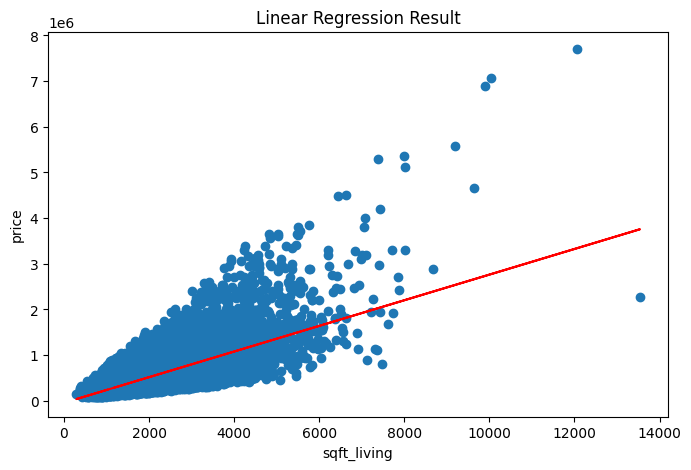

In [33]:
plt.figure(figsize=(8,5))
plt.scatter(x, y)                # 데이터 산점도
plt.plot(x.sqft_living, y_pred, 'r-')        # 회귀선
plt.xlabel('sqft_living', fontsize=10)
plt.ylabel('price', fontsize=10)
plt.title('Linear Regression Result')
plt.show();

#### 모델이 데이터를 잘 적합하고 있는지
- 그래프를 통해 직선이 모든 데이터를 잘 설명하지는 못하고 있고, 원점 (0,0)에서 멀어질수록 오차가 커지는 특정 패턴을 이루고 있으므로 단순 회귀 분석만으로는 데이터를 충분히 설명 불가

#### 회귀 모형이 통계적으로 유의한지
- H0 : 유의 X
- H1 : 유의 O

#### 모형은 데이터를 얼마나 설명하는지
- R2 Score

#### 모형 내 회귀계수는 유의한지
- 독립변수의 t 통계량 확인

In [34]:
model.summary()

# F 통계량보다 p-Value가 작으므로 회귀 모형이 통계적으로 유의하지 않다는
# 귀무가설을 기각, 대립가설을 채택하여 회귀 모형은 통계적으로 유의

# R2 Socre는 0.493으로 모델은 데이터에 대해 49.3%를 설명 가능

# sqft_living 변수의 t 통계량보다 p-Value가 작으므로 회귀계수가 통계적으로 유의하지 않다는
# 귀무가설을 기각, 대립가설을 채택하여 회귀계수는 통게적으로 유의

# 회귀식 : price = sqft_living * 280.6236 + (-43580)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Sat, 30 Mar 2024   Prob (F-statistic):               0.00
Time:                        14:11:55   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 다중 회귀분석

### 다중공선성
- 독립변수 간 강한 상관관계가 나타나 정확한 회귀계수 추정이 어려운 문제
- 독립변수가 두 개 이상일 경우 다중공선성 확인 및 해결

#### 다중공선성 검정
- 독립변수 간 상관계수 확인 : 0.9 이상일 경우 다중공선성이 존재한다고 판단
- 다중공선성이 의심되는 두 독립변수의 회귀분석을 통해 허용 오차(1-R2 Score)가 0.1 이하라면 다중공선성 심각 
- VIF(Variance Inflation Factor)가 10 이상일 경우 다중공선성이 존재한다고 판단 (VIF = 1 / (1-R2 Score))
- 독립변수의 개수가 많아질수록 계산량은 nC2로 커짐

### 변수선택법
- 종속변수에 영향을 미치는 유의미한 독립변수만을 선택하여 최적의 회귀방정식을 도출하는 과정

|구분|내용|
|:---:|:---:|
|전진선택법|단순 선형 회귀모델에서 변수를 하나씩 추가해가며 성능을 높이는 방법|
|후진제거법|모든 변수를 추가한 모델에서 유의하지 않은 변수를 제거해가며 성능을 높이는 방법|
|단계적 선택법|변수를 AIC 또는 BIC 비교를 통해 추가 혹은 제거하여 성능을 높이는 방법|

#### AIC
- AIC = -2ln(L) + 2k
  - 2ln은 모형의 적합도, k는 추정된 파라미터의 개수, L은 Likelihood Function
  - AIC 값이 낮을 수록 모형의 적합도가 높음
  - 2k는 해당 모형에 패널티를 주기 위해 사용
  
  


In [35]:
cars = pd.read_csv('./data/Cars93.csv')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        93 non-null     object 
 1   Model               93 non-null     object 
 2   Type                93 non-null     object 
 3   Min.Price           93 non-null     float64
 4   Price               93 non-null     float64
 5   Max.Price           93 non-null     float64
 6   MPG.city            93 non-null     int64  
 7   MPG.highway         93 non-null     int64  
 8   AirBags             93 non-null     object 
 9   DriveTrain          93 non-null     object 
 10  Cylinders           93 non-null     object 
 11  EngineSize          93 non-null     float64
 12  Horsepower          93 non-null     int64  
 13  RPM                 93 non-null     int64  
 14  Rev.per.mile        93 non-null     int64  
 15  Man.trans.avail     93 non-null     object 
 16  Fuel.tank.

In [36]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# ols Formula 정의 시 특수문자 사용 불가능 → Replace 필요
cars.columns = cars.columns.str.replace('.',"")
model = smf.ols(formula = "Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data = cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     19.14
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           4.88e-14
Time:                        14:11:58   Log-Likelihood:                -302.94
No. Observations:                  93   AIC:                             619.9
Df Residuals:                      86   BIC:                             637.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -32.2157     17.812     -1.809      0.074     -67.625       3.193
EngineSize     4.4732      1.410      3.172      0.002       1.670       7.276
RPM            0.0071      0.001      5.138      0.000       0.004       0.010
Weight         0.0056      0.003      1.634      0.106      -0.001       0.012
Length        -0.0464      0.094     -0.496      0.621      -0.232       0.139
MPGcity       -0.3478      0.448     -0.776      0.440      -1.239       0.544
MPGhighway     0.0582      0.460      0.126      0.900      -0.856       0.973
==============================================================================
Omnibus:                       62.984   Durbin-Watson:                   1.446
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              383.289
Skew:                           2.074   Prob(JB):                     5.89e-84
Kurtosis:                      12.039   Cond. No.                     1.61e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.61e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
cols = ['EngineSize', 'RPM', 'Weight', 'Length', 'MPGcity', 'MPGhighway']

cars[cols].corr()

# MPG city와 MPG highway 변수 간 상관도 0.9 이상 → 다중공선성
# VIF 값을 확인해 더 높은 변수를 제거

,EngineSize,RPM,Weight,Length,MPGcity,MPGhighway
EngineSize,1.000000,-0.547898,0.845075,0.780283,-0.710003,-0.626795
RPM,-0.547898,1.000000,-0.427931,-0.441249,0.363045,0.313469
Weight,0.845075,-0.427931,1.000000,0.806274,-0.843139,-0.810658
Length,0.780283,-0.441249,0.806274,1.000000,-0.666239,-0.542897
MPGcity,-0.710003,0.363045,-0.843139,-0.666239,1.000000,0.943936
MPGhighway,-0.626795,0.313469,-0.810658,-0.542897,0.943936,1.000000


In [38]:
# VIF 확인
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 독립변수 및 종속변수를 데이터프레임으로 나누어 저장
y, x = dmatrices("Price ~ EngineSize + RPM + Weight + Length + MPGcity + MPGhighway", data = cars, return_type = 'dataframe')

# 독립변수 간 VIF 값 계산
vif_list = []
for i in range(1, len(x.columns)):  # 0번째는 Intercept 이므로 제외
    vif_list.append([variance_inflation_factor(x.values, i), x.columns[i]])

vif_df = pd.DataFrame(vif_list, columns = ['VIF', 'Variable'])
vif_df

# MPGcity 변수 제거

,VIF,Variable
0,4.605118,EngineSize
1,1.446859,RPM
2,8.685973,Weight
3,4.013002,Length
4,13.668288,MPGcity
5,12.943133,MPGhighway


In [39]:
model = smf.ols(formula = "Price ~ EngineSize + RPM + Weight + Length + MPGhighway", data = cars)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.544
Method:                 Least Squares   F-statistic:                     22.95
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           1.28e-14
Time:                        14:11:58   Log-Likelihood:                -303.27
No. Observations:                  93   AIC:                             618.5
Df Residuals:                      87   BIC:                             633.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8122     17.158     -2.087      0.040     -69.916      -1.709
EngineSize     4.6591      1.386      3.361      0.001       1.904       7.415
RPM            0.0071      0.001      5.173      0.000       0.004       0.010
Weight         0.0053      0.003      1.567      0.121      -0.001       0.012
Length        -0.0194      0.087     -0.224      0.823      -0.191       0.153
MPGhighway    -0.2500      0.231     -1.082      0.282      -0.709       0.209
==============================================================================
Omnibus:                       61.903   Durbin-Watson:                   1.397
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              363.806
Skew:                           2.044   Prob(JB):                     1.00e-79
Kurtosis:                      11.785   Cond. No.                     1.56e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.56e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [40]:
# 변수선택법

import itertools

def processSubset(x, y, feature_set):
    model = sm.OLS(y, x[list(feature_set)])
    regr = model.fit()
    aic = regr.aic
    bic = regr.bic
    return {'model':regr, 'AIC':aic, 'BIC':bic}

# 전진선택법
def forward(x, y, predictors):
    # 데이터 변수가 미리 정의된 predictors에 존재하는지를 확인하여 분류
    remain_pred = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    result = []
    for p in remain_pred:
        result.append(processSubset(x, y, predictors + [p] + ['Intercept']))
        
    models = pd.DataFrame(result)
    best_aic_model = models.loc[models['AIC'].argmin()]
#     best_bic_model = models.loc[models['BIC'].argmin()]
    print(f'Processed : {models.shape[0]} models on {len(predictors) + 1} predictors in')
    print(f'Selected predictors : {best_aic_model["model"].model.exog_names} AIC : {best_aic_model[0]}')
#     print(f'Selected predictors : {best_bic_model["model"].model.exog_names} BIC : {best_bic_model[0]}')
    return best_aic_model #, best_bic_model

# 후진소거법
def backward(x, y, predictors):
    
    results = []
    
    # 데이터 변수들이 미리정의된 predictors 조합 확인
    for combo in itertools.combinations(predictors, len(predictors) -1):
        results.append(processSubset(x, y, list(combo)+['Intercept']))
    
    models = pd.DataFrame(results)
    
    # 가장 낮은 AIC를 가진 모델을 선택
    best_aic_model = models.loc[models['AIC'].argmin()]
    print(f'Processed : {models.shape[0]} models on {len(predictors) - 1} predictors in')
    print(f'Selected predictors : {best_aic_model["model"].model.exog_names} AIC : {best_aic_model[0]}')

    return best_aic_model

# 단계적 선택법
def stepwise_model(x, y):
    
    stepmodels = pd.DataFrame(columns=["AIC", "model"])
    predictors = []
    
    smodel_before = processSubset(x, y, predictors + ['Intercept'])['AIC']

    for i in range(1, len(x.columns.difference(['Intercept'])) +1):
        forward_result = forward(x, y, predictors) 
        print('forward')
        stepmodels.loc[i] = forward_result
        predictors = stepmodels.loc[i]["model"].model.exog_names
        predictors = [ k for k in predictors if k !='Intercept']
        backward_result = backward(x, y, predictors)

        if backward_result['AIC'] < forward_result['AIC']:
            stepmodels.loc[i] = backward_result
            predictors = stepmodels.loc[i]["model"].model.exog_names
            smodel_before = stepmodels.loc[i]["AIC"]
            predictors = [ k for k in predictors if k !='Intercept']
            print('backward')

        if stepmodels.loc[i]['AIC'] > smodel_before:
            break
            
        else:
            smodel_before = stepmodels.loc[i]["AIC"]
            
    # return stepmodels['model'][len(stepmodels['model'])] # 마지막 모델 

    return stepmodels['model'], (stepmodels['model'][len(stepmodels['model'])]), stepmodels

In [41]:
predictors = []
processSubset(x, y, predictors + ['Intercept'])['AIC']

686.7529864151061

In [42]:
forward_result = forward(x, y, predictors)

Processed : 6 models on 1 predictors in
Selected predictors : ['Weight', 'Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D546864F40>


In [43]:
def forward(x, y, predictors):
    # 데이터 변수가 미리 정의된 predictors에 존재하는지를 확인하여 분류
    remain_pred = [p for p in x.columns.difference(['Intercept']) if p not in predictors]
    result = []
    for p in remain_pred:
        result.append(processSubset(x, y, predictors + [p] + ['Intercept']))
        
    models = pd.DataFrame(result)
    best_aic_model = models.loc[models['AIC'].argmin()]
#     best_bic_model = models.loc[models['BIC'].argmin()]
    print(f'Processed : {models.shape[0]} models on {len(predictors) + 1} predictors in')
    print(f'Selected predictors : {best_aic_model["model"].model.exog_names} AIC : {best_aic_model[0]}')
#     print(f'Selected predictors : {best_bic_model["model"].model.exog_names} BIC : {best_bic_model[0]}')
    return best_aic_model #, best_bic_model

In [44]:
result = []
for p in [i for i in x.columns.difference(['Intercept'])]:
    result.append(processSubset(x, y, predictors + [p] + ['Intercept']))
    
model = pd.DataFrame(result)
best = model.loc[model['AIC'].argmin()]

In [45]:
best.model.model.exog_names

['Weight', 'Intercept']

In [46]:
a, b, c = stepwise_model(x, y)
c

Processed : 6 models on 1 predictors in
Selected predictors : ['Weight', 'Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D545ABBA00>
forward
Processed : 1 models on 0 predictors in
Selected predictors : ['Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D545ABB280>
Processed : 5 models on 2 predictors in
Selected predictors : ['Weight', 'RPM', 'Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D54684F550>
forward
Processed : 2 models on 1 predictors in
Selected predictors : ['Weight', 'Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D54685B280>
Processed : 4 models on 3 predictors in
Selected predictors : ['Weight', 'RPM', 'EngineSize', 'Intercept'] AIC : <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000001D54684F190>
forward
Processed : 3 models on 2 predictors i

,AIC,model
1,638.279067,<statsmodels.regression.linear_model.Regressio...
2,624.524153,<statsmodels.regression.linear_model.Regressio...
3,616.09765,<statsmodels.regression.linear_model.Regressio...
4,616.09765,<statsmodels.regression.linear_model.Regressio...
5,616.09765,<statsmodels.regression.linear_model.Regressio...
6,616.09765,<statsmodels.regression.linear_model.Regressio...


In [47]:
b.summary()

# 단계적 선택법을 통해 Weight, RPM, EngineSize가 포함된 다중 선형 회귀 모델을 채택
# 해당 모델은 전체 데이터의 54.7%를 설명 가능
# 회귀식 : Price = 0.0073Weight + 0.0071RPM + 4.3054EngineSize - 51.7933

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.547
Method:                 Least Squares   F-statistic:                     37.98
Date:                Sat, 30 Mar 2024   Prob (F-statistic):           6.75e-16
Time:                        14:11:58   Log-Likelihood:                -304.05
No. Observations:                  93   AIC:                             616.1
Df Residuals:                      89   BIC:                             626.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Weight         0.0073      0.002      3.372      0.001       0.003       0.012
RPM            0.0071      0.001      5.208      0.000       0.004       0.010
EngineSize     4.3054      1.325      3.249      0.002       1.673       6.938
Intercept    -51.7933      9.106     -5.688      0.000     -69.887     -33.699
==============================================================================
Omnibus:                       62.441   Durbin-Watson:                   1.406
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              361.880
Skew:                           2.076   Prob(JB):                     2.62e-79
Kurtosis:                      11.726   Cond. No.                     8.27e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 군집분석
- 각 객체의 유사성을 측정하여 유사성이 높은 대상 집단을 분류하는 통계적 기법
- 객체 간의 상이성을 규명하고 군집의 특성을 파악
- 비지도학습

### 계층적 군집분석
- n개의 군집으로 시작해 점차 군집의 개수를 줄여나가는 방법
- 군집 간 거리 계산 방법에 따라 연결법이 달라지고, 거리행렬을 통한 가까운 거리의 객체들 관계를 규명하고 군집의 개수를 선택
|구분|내용|
|:---:|:---:|
|최단 연결법|거리행렬에서 거리가 가장 가까운 데이터로 군집 형성|
|최장 연결법|데이터와의 거리를 계산할 때 최장거리로 계산|
|평균 연결법|데이터와의 거리를 계산할 때 평균을 거리로 계산|
|중심 연결법|두 군집의 거리를 각 군집의 중심 간 거리로 계산|
|와드 연결법|군집 내 편차제곱합에 근거를 두고 군집화|
- 와드 연결법 : 데이터의 크기가 너무 크지 않다면 사용하는 연결법으로, 군집 내 편차는 작고 군집 간 편차는 크게 군집화를 시키는 것이 정보의 손실(SSE)를 최소화할 수 있기때문에 계산량은 많지만 군집 크기를 비슷하게 만들며 해석력이 좋다는 장점이 있는 연결법
- scipy.cluster.hierarchy
  - linkage(y, method, metric)
   - y : 데이터프레임 값 (Not NULL)
   - method : 
     |입력값|내용|
     |:---:|:---:|
     |single|최단 연결법|
     |complete|최장 연결법|
     |average|평균 연결법|
     |centroid|중심 연결법|
     |ward|와드 연결법|
   - metric
     |입력값|내용|
     |:---:|:---:|
     |euclidean|유클리디언 거리|
     |seuclidean|표준화 거리|
     |mahalanobis|마할라노비스 거리|
     |chebyshev|체비셰프 거리|
     |cityblock|맨해튼 거리|
     |canberra|캔버라 거리|
     |minkowski|민코우스키 거리|
     |jaccard|자카드 거리|
     |cosine|코사인 유사도|
  - dendrogram(Z, orientation='top', labels=None, color_threshold=None, get_leaves=True)
   - Z : linkage 결과값
   - orientation : 덴드로그램 시각화 방향
  - fcluster(Z, t, criterion='distance')
   - Z : linkage 결과값
   - t : flat clusters를 형성할 때 적용하는 임계값으로, 덴드로그램의 color_threshold와 일치하게 설정하면 그 값에 따른 군집 결과의 확인 가능
   - distance : 각 군집의 관측값이 t보다 작은 거리를 가지도록 평면 군집을 형성(하나로 형성되는 것을 방지)

In [48]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

In [49]:
us_crime = pd.read_csv('./data/USArrests.csv')
us_crime.columns = ['State'] + us_crime.columns[1:].tolist()
us_crime.head()

,State,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


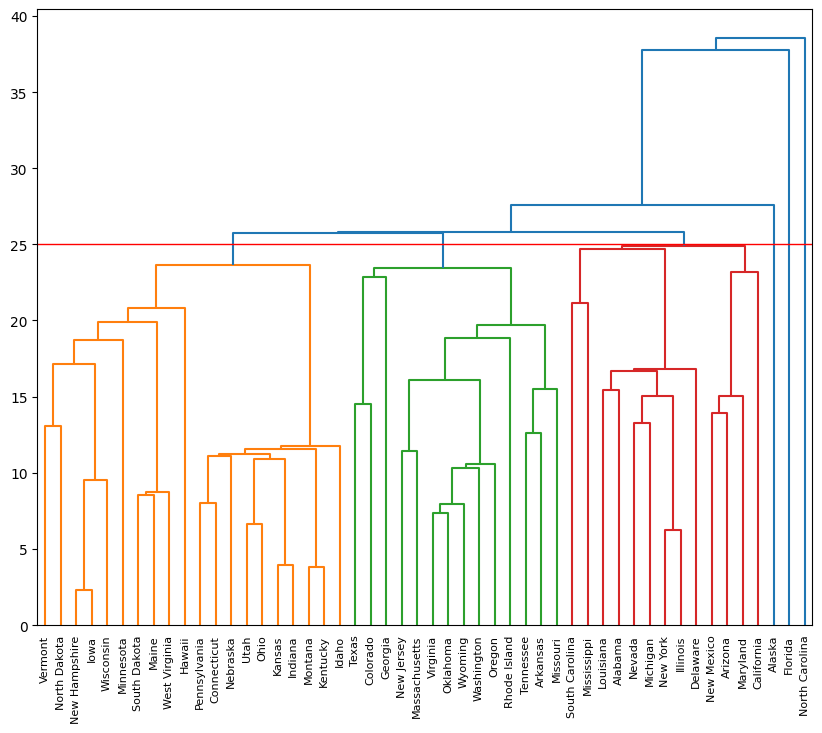

In [50]:
# 최단연결법
single = linkage(us_crime.iloc[:,1::], metric='euclidean', method='single')

# 덴드로그램
plt.figure(figsize=(10, 8))
dendrogram(single, orientation='top', labels=us_crime.State.tolist(),
           distance_sort='descending', color_threshold=25, show_leaf_counts=True)
plt.axhline(y=25, color='r', linewidth=1) # threshold 값에 직선 표현
plt.show();

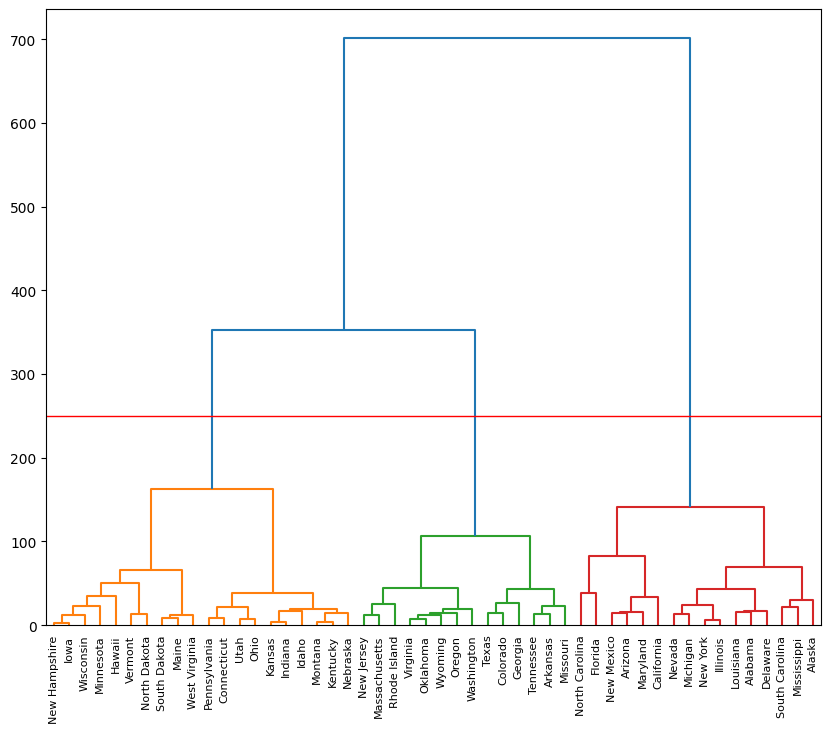

In [51]:
# 와드연결법
ward = linkage(us_crime.iloc[:,1:], metric='euclidean', method='ward')

# 덴드로그램
# 덴드로그램
plt.figure(figsize=(10, 8))
dendrogram(ward, orientation='top', labels=us_crime.State.tolist(),
           distance_sort='descending', color_threshold=250, show_leaf_counts=True)
plt.axhline(y=250, color='r', linewidth=1) # threshold 값에 직선 표현
plt.show();

In [52]:
# state 마다 어떤 군집에 설정되었는지 확인
assignments = fcluster(ward, 250, 'distance')
assignments

array([1, 1, 1, 2, 1, 2, 3, 1, 1, 2, 3, 3, 1, 3, 3, 3, 3, 1, 3, 1, 2, 1,
       3, 1, 2, 3, 3, 1, 3, 2, 1, 1, 1, 3, 3, 2, 2, 3, 2, 1, 3, 2, 2, 3,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [53]:
us_crime['cluster'] = assignments
us_crime.groupby('cluster').mean()

# 1번 집단은 치안이 낮고, 3번 집단은 치안이 높다고 할 수 있음

,Murder,Assault,UrbanPop,Rape
cluster,,,,
1,11.812500,272.562500,68.312500,28.375000
2,8.214286,173.285714,70.642857,22.842857
3,4.270000,87.550000,59.750000,14.390000


### 비계층적 군집분석
- 랜덤으로 군집 생성
- K-Means, DBSCAN, 혼합분포 군집분석 등

#### K-Means
- 속성의 개수가 적은 단순 데이터에 활용
- 주어진 데이터를 K개의 클러스터로 군집화하여 각 클러스터와 거리 차이의 분산을 최소화하는 방식으로 작동
- 변수가 많은 경우 군집화의 정확도 감소
- K값 설정 필요 (하라바츠 스코어, 엘보우 기법 등)

In [54]:
from sklearn.cluster import KMeans

x = iris_df.drop(columns = ['target'])
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
from sklearn.metrics import calinski_harabasz_score # 가장 큰 값을 군집의 수로 결정

for k in range(2, 10):
    kmeans_model = KMeans(n_clusters=k, random_state=2024).fit(x)
    labels = kmeans_model.labels_
    print(f'{k}-Means : {calinski_harabasz_score(x, labels)}')

2-Means : 513.3038433517568
3-Means : 560.3999242466402
4-Means : 529.3982941434156
5-Means : 494.0943819140986
6-Means : 474.85419152314864
7-Means : 450.66218763181786
8-Means : 440.76409297283294
9-Means : 407.59420319448935


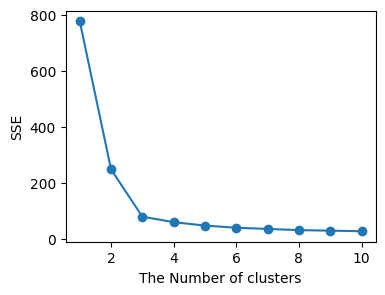

[776.9843999999999, 247.65250340400698, 78.94084142614601, 59.43816557610243, 47.07446112266113, 39.469842121050824, 35.15187552155659, 30.995846530920062, 28.990876782531192, 27.001779551588765]


In [130]:
# Elbow Method

sse = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=2024).fit(x)
    sse.append(km.inertia_)

plt.figure(figsize=(4,3))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('The Number of clusters')
plt.ylabel('SSE')
plt.show();
print(sse)

# 기울기가 소실되는 지점의 K 값을 최적의 군집수로 결정

In [57]:
# K=3 대입
km = KMeans(n_clusters=3, random_state=2024)
km.fit(x)

x['cluster'] = km.labels_
x.groupby('cluster').mean()

,sepal length,sepal width,petal length,petal width
cluster,,,,
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


<Figure size 800x600 with 0 Axes>

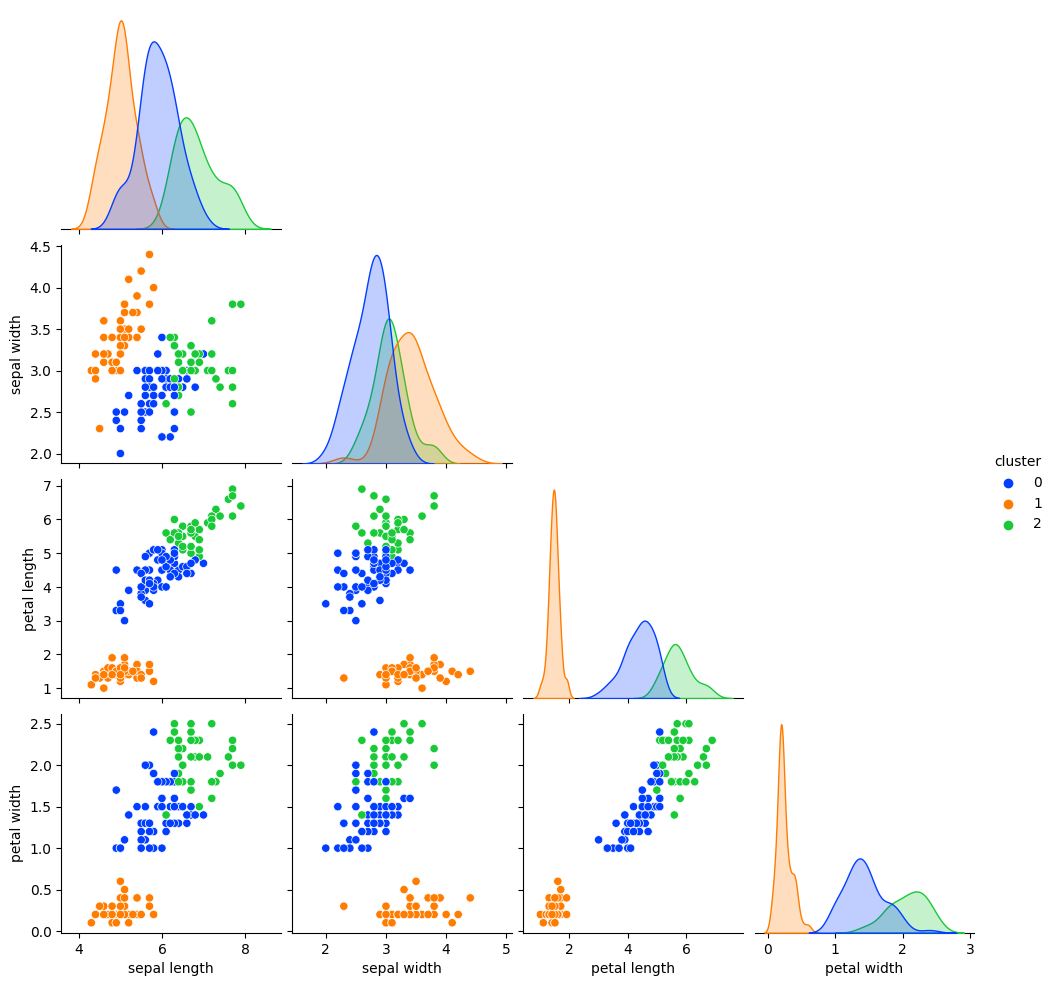

In [58]:
# 군집결과 시각화
import seaborn as sns

plt.figure(figsize=(8,6))
sns.pairplot(x, diag_kind='kde', hue='cluster', corner=True, palette='bright')
plt.show()

<Figure size 800x600 with 0 Axes>

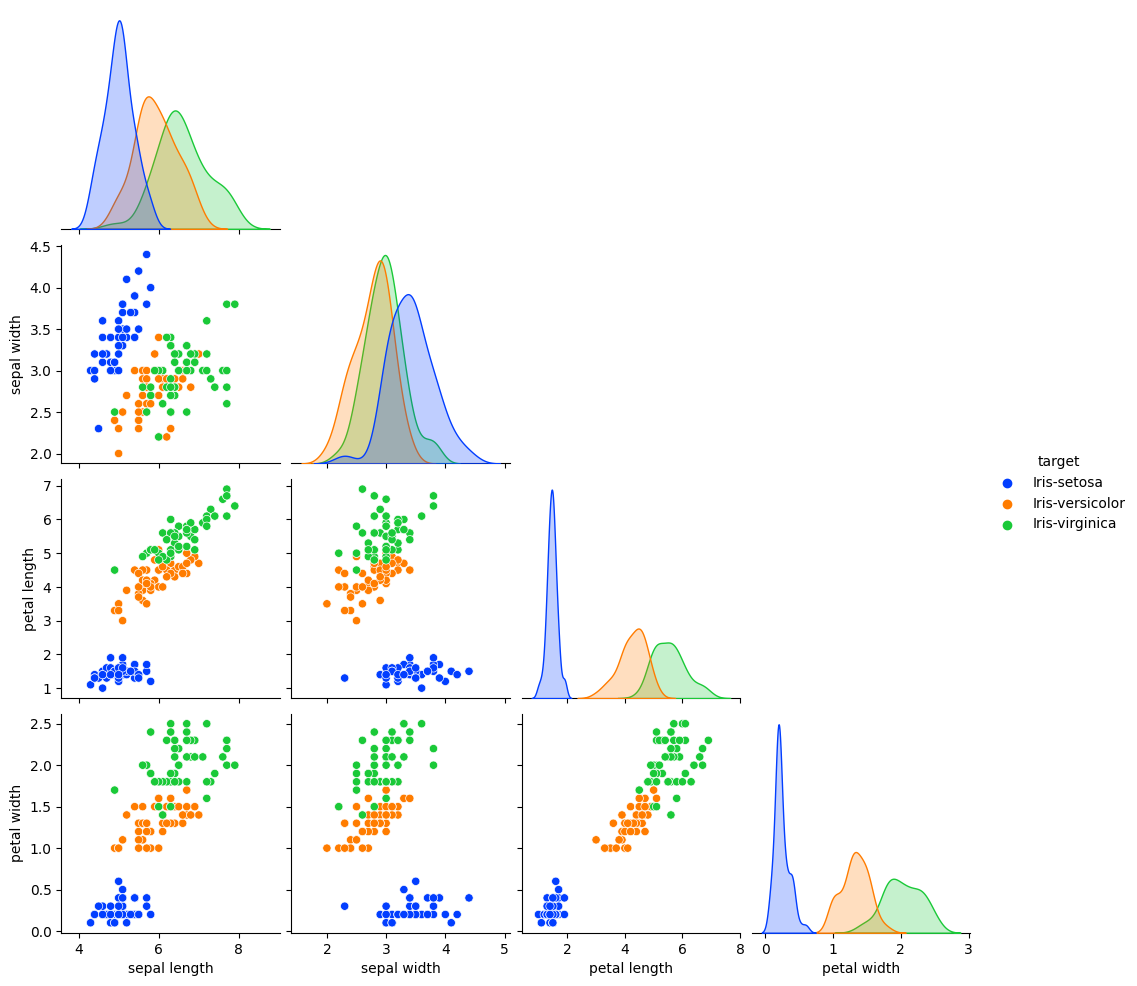

In [59]:
# 원본
plt.figure(figsize=(8,6))
sns.pairplot(iris_df, diag_kind='kde', hue='target', corner=True, palette='bright')
plt.show()

#### 혼합분포 군집분석
- 모형 기반 방법
- 데이터가 k개의 모수적 모형의 가중합으로 표현되는 모집단 모형으로부터 나왔다는 가정 하에 군집분석 진행
- K-Means는 원형으로 군집화된 데이터에 적합하고, DBSCAN은 반달 형태의 데이터 군집화에 적합하지만, 정규분포 형태의 데이터 군집화에 필요
- Expectation-Maximization (EM) 사용
  - 초기값 설정 : 필요 모수에 대해 초기값 설정
  - E : 잠재변수 Z의 기대치 계산 (X가 특정 군집에 속할 확률 계산)
  - M : 잠재변수 Z의 기대치를 이용해 파라미터 추정 (계산된 확률을 통해 모수를 재추정)
  - 반복 정지 : 수렴조건(최대가능도가 최대인가?)이 만족될 때까지 E와 M 반복
- sklearn.mixture.GaussianMixture(n_components=1, *, covariance_type='full', tol=0.001, reg_covar=1e-06, max_iter=100, n_init=1, init_params='kmeans', weights_init=None, means_init=None, precisions_init=None, random_state=None, warm_start=False, verbose=0, verbose_interval=10)
  - n_components : 예상 군집 수 설정
  - max_iter : 수행할 EM 반복 횟수

In [60]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [61]:
df = iris_df.drop(columns=['target'])

# 스케일링
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# 모델 구축
gmm = GaussianMixture(n_components=3)
gmm.fit(df_scaled)
gmm_labels = gmm.predict(df_scaled)
gmm_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [62]:
df['gmm_cluster'] = gmm_labels
df.groupby('gmm_cluster').mean()

,sepal length,sepal width,petal length,petal width
gmm_cluster,,,,
0,5.904444,2.775556,4.193333,1.293333
1,5.006000,3.418000,1.464000,0.244000
2,6.554545,2.950909,5.489091,1.989091


<Figure size 800x600 with 0 Axes>

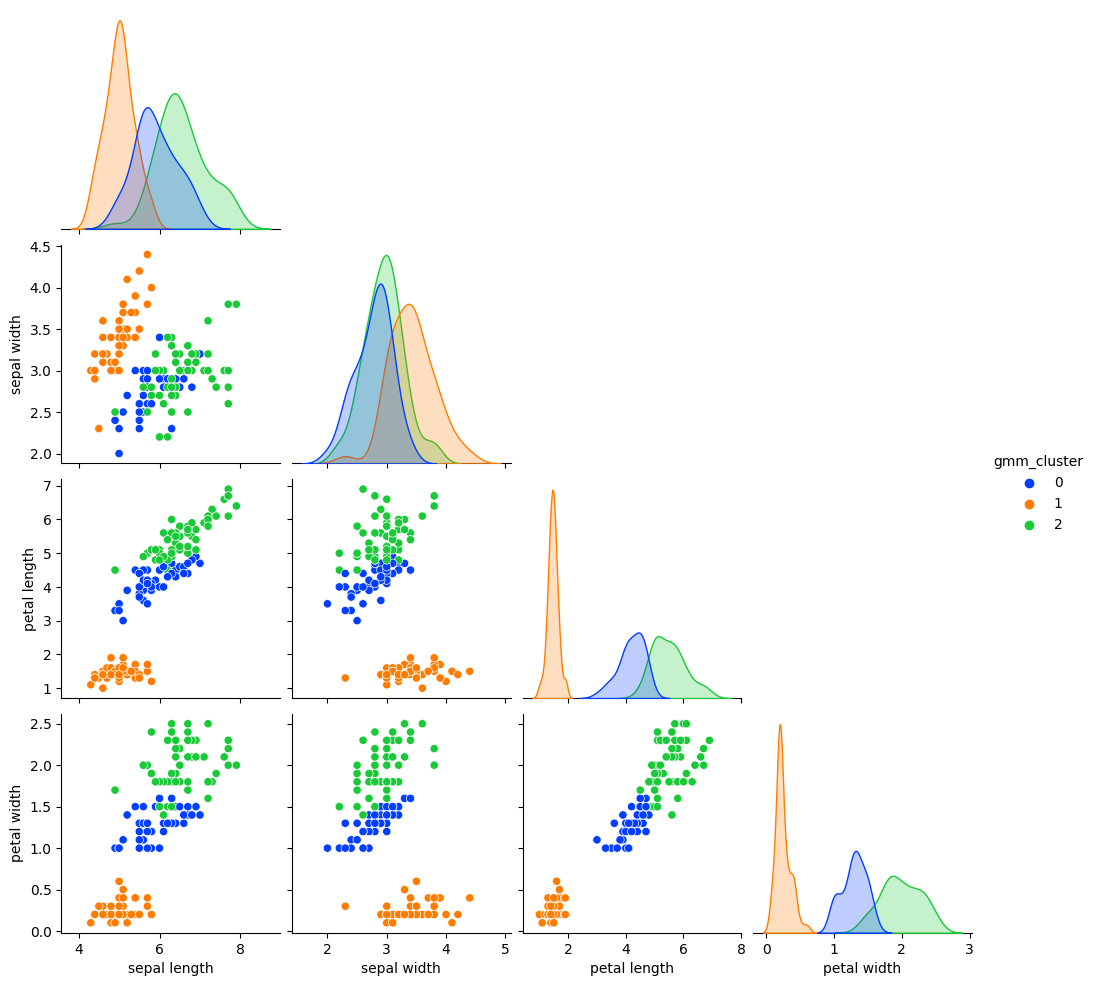

In [63]:
plt.figure(figsize=(8,6))
sns.pairplot(df, hue='gmm_cluster', palette='bright', diag_kind='kde', corner=True)
plt.show();

## 연관분석 (장바구니 분석)
- 사건의 연관규칙을 찾는 방법으로 A 후에 B 사건을 시행할 확률 - 소비자의 구매 패턴 분석

### Run-Test
- 연관규칙을 찾기 전 연속적인 Binary 관측값들이 임의적으로 나타난 값인지(연관이 있는지) 아닌지를 검정하는 기법
- H0 귀무가설 : 연속적인 관측값이 임의적
- H1 대립가설 : 연속적인 관측값이 임의적 X (연관 O)
- statsmodels.sandbox.stats.runs.runtest_1samp
- runtest_1samp(x, cutoff='mean', correction=True)
  - x : 2개의 관측값으로 이루어진 배열 형식의 Binary data 입력 필요 (정수형)
  - cutoff : {'mean', 'median'} or number - 큰 값과 작은 값으로 나누기 위한 기준
  - correction : 50 미만의 샘플 사이즈일 경우 데이터에 각 사건이 일어날 확률 정의가 어렵기 때문에 해당 확률을 0.5로 수정
  - Z-Stat, P-Value 반환 (정규분포)

In [64]:
data = ['a', 'a', 'b', 'b', 'a', 'a', 'a', 'a', 'b',
        'b', 'b', 'b', 'b', 'a', 'a', 'b', 'b', 'a', 'b', 'b']
test_df = pd.DataFrame(data, columns=['product'])
test_df.head()

,product
0,a
1,a
2,b
3,b
4,a


In [65]:
from statsmodels.sandbox.stats.runs import runstest_1samp

In [66]:
test_df = test_df['product'].map({'a':1,'b':0})
runstest_1samp(test_df, cutoff=0.5, correction=True)

# P-Value가 0.05 이상이므로 귀무가설 채택 → 연속적인 관측값은 확률적으로 임의적이다.
# 즉, 상품 a와 b의 구매는 연관이 없다.

(-1.1144881152070183, 0.26506984027306035)

### 연관규칙 분석
- 장바구니 분석 : 장바구니에 무엇이 들어갈지 분석
- 서열 분석 : A를 산 다음 B를 살 것

#### 연관규칙 분석의 척도
- 지지도(Support) : 전체 거래 중 항목 A와 항목 B를 동시에 포함하는 거래의 비율 = P(A∩B) / P(전체)
- 신뢰도(Confidence) : 항목 A를 포함한 거래 중에서 항목 A와 항목 B가 같이 포함될 확률 = P(A∩B) / P(A)
- 향상도(Lift) : A가 구매되지 않았을 때 품목 B의 구매확률 대비, A가 구매되었을 때 품목 B의 구매 확률의 증가비 = P(A∩B) / P(A)P(B) = P(B|A) / P(B)
  - 품목 A, B의 구매가 서로 관련이 없는 경우 향상도는 1
  
### Apriori
- 가능한 모든 경우의 수를 탐색하여 척도 계산 : n * (n-1)
  - 빈발집합(최소지지도보다 큰 지지도 값을 갖는 품목의 집합)만을 고래해서 연관규칙을 생성하는 Apriori 제안
- mlxtend.frequent_patterns.apriori
- mlxtend.frequent_patterns.association_rules

- aprior(df, min_support, use_colnames, max_len, low_memory)
  - df : 값이 0과 1 혹은 True, False인 DataFrame
  - min_support : 최소 지지도 (default=0.5)
  - use_colnames : True일 경우 반환된 DataFrame의 Columns 이름 사용 (default=False)
  - max_len : 생성된 항목 세트의 최대 길이로, None인 경우 가능한 모든 항목 세트 길이를 평가
  
- association_rules(df, metric, min_threshold, support_only)
  - df : aprior와 동일
  - metric : {'support', 'confidence', 'lift'} - support_only일 경우 support로 자동 설정
  - min_threshold : metric에 지정된 rule의 최소값 (default=0.8)
  - support_only : support만 계산

In [67]:
from mlxtend.preprocessing import TransactionEncoder

switches = {'A':'Apple', 'B':'Beer', 'R':'Rice', 'C':'Chicken', 'Ba':'Bananas', 'M':'Milk'}

inits = [['A B R C'], ['A B R'], ['A B'], ['A Ba'], ['M B R C'], ['M B R'], ['M B'], ['A Ba']]
dataset = [[switches[j] for j in i[0].split(' ')] for i in inits]
dataset

[['Apple', 'Beer', 'Rice', 'Chicken'],
 ['Apple', 'Beer', 'Rice'],
 ['Apple', 'Beer'],
 ['Apple', 'Bananas'],
 ['Milk', 'Beer', 'Rice', 'Chicken'],
 ['Milk', 'Beer', 'Rice'],
 ['Milk', 'Beer'],
 ['Apple', 'Bananas']]

In [68]:
te = TransactionEncoder()
te_ary = te.fit_transform(dataset)
print(te.columns_)
te_ary

['Apple', 'Bananas', 'Beer', 'Chicken', 'Milk', 'Rice']


array([[ True, False,  True,  True, False,  True],
       [ True, False,  True, False, False,  True],
       [ True, False,  True, False, False, False],
       [ True,  True, False, False, False, False],
       [False, False,  True,  True,  True,  True],
       [False, False,  True, False,  True,  True],
       [False, False,  True, False,  True, False],
       [ True,  True, False, False, False, False]])

In [69]:
apriori_df = pd.DataFrame(te_ary, columns=te.columns_)
apriori_df

,Apple,Bananas,Beer,Chicken,Milk,Rice
0,True,False,True,True,False,True
1,True,False,True,False,False,True
2,True,False,True,False,False,False
3,True,True,False,False,False,False
4,False,False,True,True,True,True
5,False,False,True,False,True,True
6,False,False,True,False,True,False
7,True,True,False,False,False,False


In [70]:
from mlxtend.frequent_patterns import apriori, association_rules
apriori(apriori_df, min_support=0.6, use_colnames=True) # 지지도 60% 이상 데이터만 추출

,support,itemsets
0,0.625,(Apple)
1,0.750,(Beer)


In [71]:
# 규칙 길이 추출
frequent_df = apriori(apriori_df, min_support=0.3, use_colnames=True)
frequent_df['length'] = frequent_df.itemsets.apply(lambda x:len(x))
frequent_df

,support,itemsets,length
0,0.625,(Apple),1
1,0.750,(Beer),1
2,0.375,(Milk),1
3,0.500,(Rice),1
4,0.375,"(Apple, Beer)",2
5,0.375,"(Milk, Beer)",2
6,0.500,"(Rice, Beer)",2


In [72]:
gro_df = pd.read_csv('./data/groceries.csv', header=None)
gro_df.head()

,0
0,"citrus fruit,semi-finished bread,margarine,rea..."
1,"tropical fruit,yogurt,coffee"
2,whole milk
3,"pip fruit,yogurt,cream cheese,meat spreads"
4,"other vegetables,whole milk,condensed milk,lon..."


In [73]:
pre_data = [i[0].split(',') for i in np.array(gro_df)]
pre_data[:5]

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product']]

In [74]:
te = TransactionEncoder()
te_ary = te.fit_transform(pre_data)
print(te.columns_)
te_ary

['Instant food products', 'UHT-milk', 'abrasive cleaner', 'artif. sweetener', 'baby cosmetics', 'baby food', 'bags', 'baking powder', 'bathroom cleaner', 'beef', 'berries', 'beverages', 'bottled beer', 'bottled water', 'brandy', 'brown bread', 'butter', 'butter milk', 'cake bar', 'candles', 'candy', 'canned beer', 'canned fish', 'canned fruit', 'canned vegetables', 'cat food', 'cereals', 'chewing gum', 'chicken', 'chocolate', 'chocolate marshmallow', 'citrus fruit', 'cleaner', 'cling film/bags', 'cocoa drinks', 'coffee', 'condensed milk', 'cooking chocolate', 'cookware', 'cream', 'cream cheese', 'curd', 'curd cheese', 'decalcifier', 'dental care', 'dessert', 'detergent', 'dish cleaner', 'dishes', 'dog food', 'domestic eggs', 'female sanitary products', 'finished products', 'fish', 'flour', 'flower (seeds)', 'flower soil/fertilizer', 'frankfurter', 'frozen chicken', 'frozen dessert', 'frozen fish', 'frozen fruits', 'frozen meals', 'frozen potato products', 'frozen vegetables', 'fruit/ve

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ...,
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [75]:
df = pd.DataFrame(te_ary, columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [76]:
gro_ap = apriori(df, min_support=0.01, use_colnames=True)
gro_ap.head()

,support,itemsets
0,0.033452,(UHT-milk)
1,0.017692,(baking powder)
2,0.052466,(beef)
3,0.033249,(berries)
4,0.026029,(beverages)


In [77]:
association_rules(gro_ap, min_threshold=0.3, metric='confidence')

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(beef),(other vegetables),0.052466,0.193493,0.019725,0.375969,1.943066,0.009574,1.292416
1,(beef),(root vegetables),0.052466,0.108998,0.017387,0.331395,3.040367,0.011668,1.332628
2,(beef),(whole milk),0.052466,0.255516,0.021251,0.405039,1.585180,0.007845,1.251315
3,(berries),(other vegetables),0.033249,0.193493,0.010269,0.308869,1.596280,0.003836,1.166938
4,(berries),(whole milk),0.033249,0.255516,0.011795,0.354740,1.388328,0.003299,1.153774
...,...,...,...,...,...,...,...,...,...
120,"(soda, yogurt)",(whole milk),0.027351,0.255516,0.010473,0.382900,1.498535,0.003484,1.206423
121,"(tropical fruit, yogurt)",(whole milk),0.029283,0.255516,0.015150,0.517361,2.024770,0.007668,1.542528
122,"(tropical fruit, whole milk)",(yogurt),0.042298,0.139502,0.015150,0.358173,2.567516,0.009249,1.340701
123,"(whipped/sour cream, yogurt)",(whole milk),0.020742,0.255516,0.010880,0.524510,2.052747,0.005580,1.565719


In [78]:
# 여러 조건
rules = association_rules(gro_ap, min_threshold=1, metric='lift')
rules['antecedents_len'] = rules.antecedents.apply(lambda x: len(x))
rules[(rules['antecedents_len'] >= 2) & (rules['confidence'] >= 0.4) & (rules['lift'] >= 3)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedents_len
418,"(citrus fruit, root vegetables)",(other vegetables),0.017692,0.193493,0.010371,0.586207,3.029608,0.006948,1.949059,2
490,"(tropical fruit, root vegetables)",(other vegetables),0.021047,0.193493,0.012303,0.584541,3.020999,0.008231,1.941244,2


## 시계열분석

### 시계열 분해
- 추세(Trend) : 시간의 요인
- 계절성(Seasonality) : 시간의 요인
- 잔차(Residual) : 외부 요인(불규칙 요인)

#### 모형 판단
- Additive 모형과 Multiplicative 모형 중 더 적합한 모델 판단
  - 추세와 계절성이 별개로 존재 → Additive 모형
  - 추세에 따라 계절성이 존재 → Multiplicative 모형

In [79]:
ts_df = pd.read_csv('./data/arima_data.csv', names = ['day', 'price'])
ts_df.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [80]:
ts_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   day     60 non-null     object
 1   price   60 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [81]:
ts_df.day = pd.to_datetime(ts_df.day, format='%Y-%m-%d')
ts_df.set_index('day', inplace=True)
ts_df.head()

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190
2013-04-01,5783
2013-05-01,6298


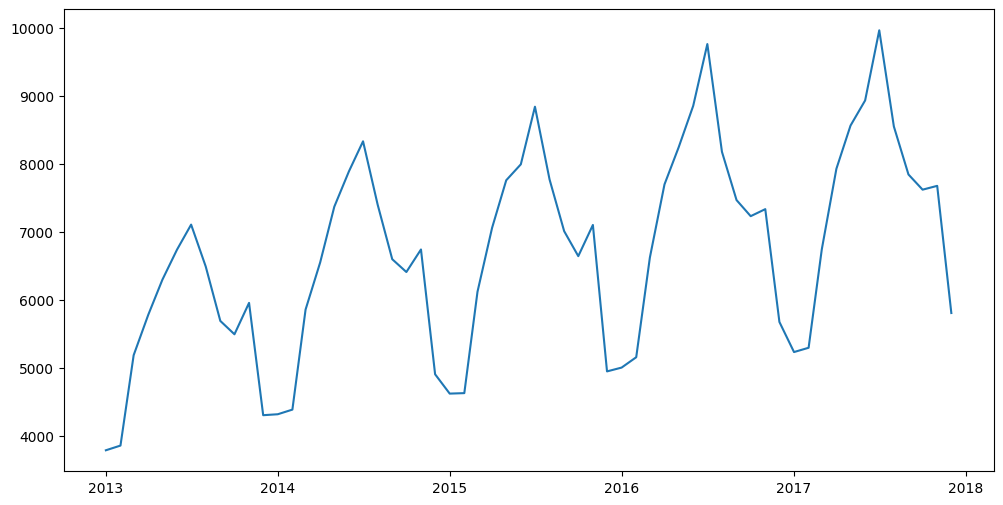

In [133]:
plt.plot(ts_df.index, ts_df.price);
# 추세에 따라 계절성이 존재하므로 Multiplicative 적용

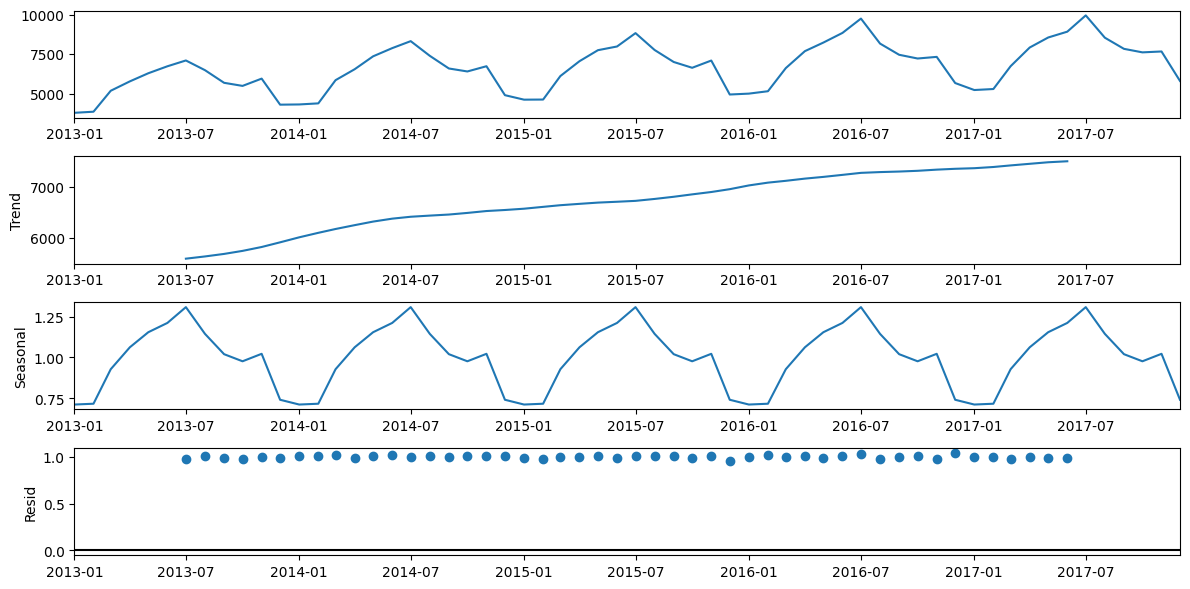

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose # 시계열 분해

result = seasonal_decompose(ts_df, model='multiplicative')

plt.rcParams['figure.figsize'] = [12,6]
result.plot()
plt.show()

### 정상성 변환
- ARIMA : AR(자기회귀) 모형과 MA(이동평균) 모형을 합한 모형
- 정상성 : 평균, 분산이 시간에 따라 일정한 성질, 즉 시계열 데이터의 특성이 시간의 흐름에 따라 변하지 않는 상태
  - 추세나 계절성이 있는 시계열은 비정상 시계열
- 정상성 변환 : 로그 변환, 차분

#### 로그 변환
- 분산(변동폭)이 일정하지 않은 경우에 사용

#### 차분
- 로그 변환 후 추세, 계절성이 존재하는 경우에 차분 사용

#### 정상성 검정
- Agumented Dickey-Fuller Test
  - H0 귀무가설 : 데이터가 비정상성
  - H1 대립가설 : 데이터가 정상성
- statsmodels.tsa.stattools.adfuller
- adfuller(x, maxlag, regression, autolag)
  - x : 2개의 관측값으로 이루어진 배열 형식의 Binary Data (정수형)
  - regression : {'nc' : 추세 없음, 'c' : 상수항만 사용, 'ct' : 상수항과 1차 추세, 'ctt' : 상수항과 2차 추세}, 테스트의 버전으로 아무 추세가 없을 경우 nc 또는 c 선택 가능
  - T-Stat, P-Value 반환

In [84]:
from statsmodels.tsa.stattools import adfuller

train_idx = ts_df[:'2016-12-01']
test = ts_df.drop(train_idx.index)

adf = adfuller(train_idx, regression='ct')
print(f'ADF Statistics : {adf[0]}')
print(f'P-Value : {adf[1]}')

# P-Value가 0.05 이상이므로 귀무가설 채택 → 해당 시계열은 비정상성을 갖는다. → 정상성 변환 필요

ADF Statistics : -1.999719934132788
P-Value : 0.6015863303794134


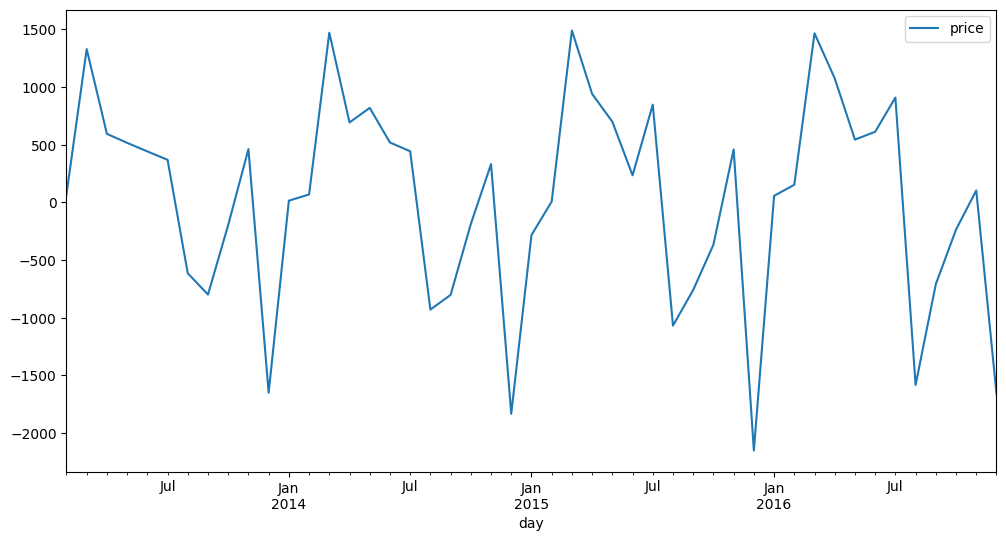

In [85]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

diff_data = train_idx.diff(1)
diff_data = diff_data.dropna()
diff_data.plot();
# 트렌트 X

In [86]:
adf = adfuller(diff_data, regression='c')
print(f'ADF Statistics : {adf[0]}')
print(f'P-Value : {adf[1]}')
# 1차분으로 정상성

ADF Statistics : -12.094547576926388
P-Value : 2.0851606399614422e-22


### AR 모형, MA 모형

#### AR(Auto Regressive) : 자기회귀 모형
- 현 시점의 데이터를 이전의 데이터들의 상관성으로 나타내는 모형
- 과거의 값이 현재의 값에 얼마나 영향을 미쳤는지를 파악 (영향도가 낮을 경우 모형의 성능도 저하)
- 최적의 모델을 만들기 위한 과거의 값을 p 라고 하며, AR(p) 모형

#### PACF(Partial Auto Correlation Function) : 편자기상관 함수
- ACF와 달리 시차가 다른 두 시계열 데이터 간의 순수한 상호 연관성을 나타냄
- PACF 값이 0에 수렴할 때의 p값을 AR 모형의 p값으로 설정

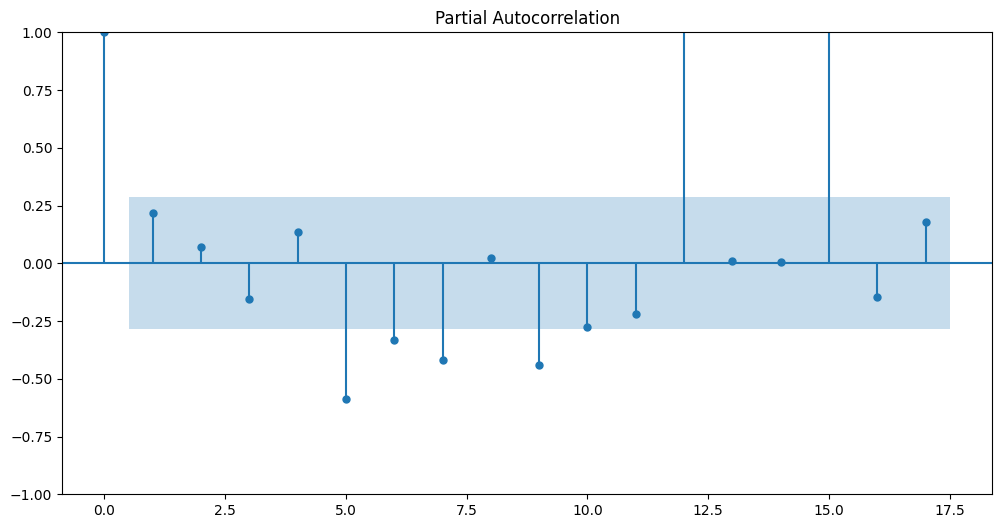

In [135]:
plot_pacf(diff_data)
plt.show();

# 시차 2 이후에 0에 수렴하므로 최적의 p는 2로 설정 가능

#### MA(Moving Average) : 이동평균 모형
- 과거의 예측 오차들의 가중이동평균으로 현재 시점의 데이터를 표현하는 모형(과거의 예측 오차를 활용해 미래를 예측)
- MA 모형을 최적화하기 위한 변수를 q라 하며, 이 모형을 MA(q)

#### ACF(Auto Correlation Function) : 자기상관 함수
- 시차에 따른 자기상관성을 의미
- 비정상 시계열일 경우 ACF 값은 느리게 0에 근접
- 정상 시계열일 경우 빠르게 0으로 수렴하며, 0으로 수렴할 때 시차를 q로 설정

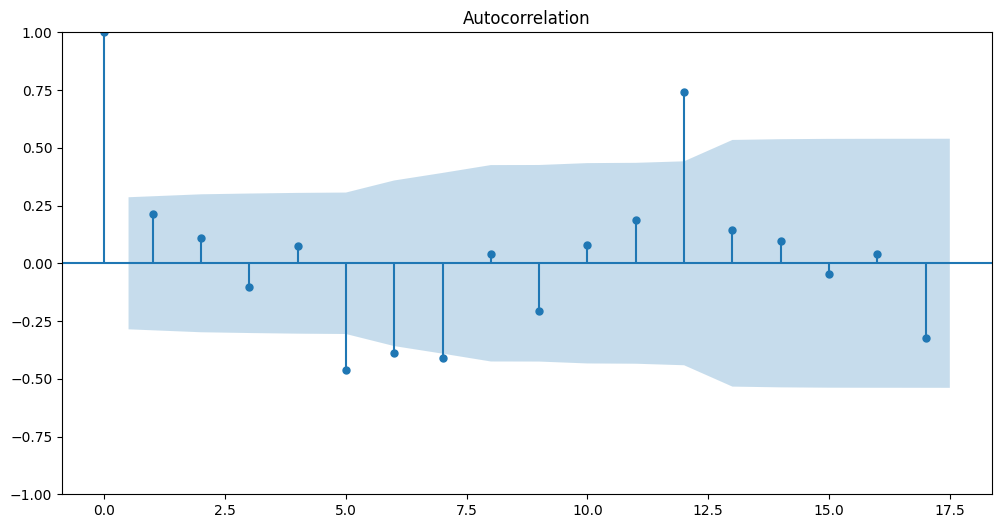

In [88]:
plot_acf(diff_data)
plt.show()

# 빠르게 0에 수렴하므로 해당 시계열은 정상 시계열이며, 시차 2 이후에 0에 수렴하므로 q는 2로 설정 가능

### ARIMA (Auto Regressive Intergrated Moving Average) : 자기회귀누적이동평균
- 비정상 시계열 자료를 분석하는 모델로, 차분을 활용하여 비정상 시계열을 정상 시계열로 변환하여 모델에 적합
- 정상 시계열의 경우 AR 모형과 MA 모형이 상호 변환이 가능하기 때문에 두 모형을 결합하여 과거 시점의 데이터로 현재 혹은 미래 시점의 데이터를 예측하는 모형
- 파라미터로는 p, d, q를 사용하며, d는 정상성을 가지게 될 때까지 사용되는 차분의 횟수
- 시계열 자료 외 다른 자료가 없을 경우 그 변동 상태를 확인할 수 있고, 어떠한 시계열에도 적용 가능


- from statsmodels.tsa.arima.model import ARIMA
  - endog(exog) : 인데스를 가지고 1개 관측값으로 이루어진 DF 입력
  - order : (p, d, q) - AR, Diff, MA rkqt tjfwjd
  - trend : regression 매개변수와 동일

In [89]:
from statsmodels.tsa.api import ARIMA

model = ARIMA(train_idx, order=(2,1,2))
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   48
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -375.875
Date:                Sat, 30 Mar 2024   AIC                            761.750
Time:                        14:12:15   BIC                            771.001
Sample:                    01-01-2013   HQIC                           765.231
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3167      0.190     -6.940      0.000      -1.689      -0.945
ar.L2         -0.3191      0.190     -1.675      0.094      -0.692       0.054
ma.L1          1.9700      0.243      8.121      0.000       1.495       2.445
ma.L2          0.9950      0.241      4.126      0.000       0.522       1.468
sigma2      4.453e+05   1.13e-06   3.93e+11      0.000    4.45e+05    4.45e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.74   Prob(JB):                         0.83
Heteroskedasticity (H):               1.49   Skew:                            -0.21
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.88
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.35e+26. Standard errors may be unstable.
"""

ar.L1, ar.L2 : p가 2

ma.L1, ma.L2 : q가 2

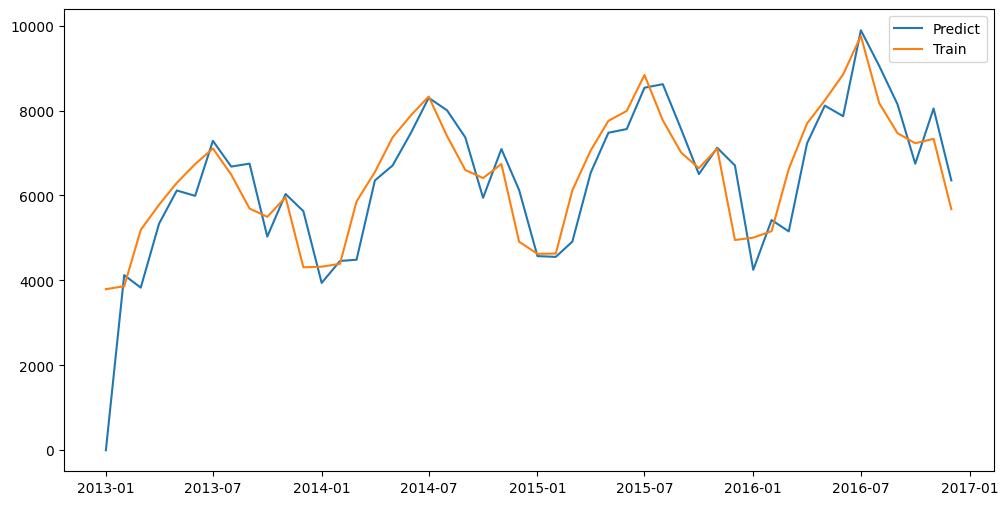

In [90]:
plt.plot(res.predict(), label='Predict')
plt.plot(train_idx, label='Train')
plt.legend()
plt.show();

In [91]:
# forecast 함수 : 예측할 만큼의 길이를 steps에 할당해 주기 때문에 predict보다 주로 forecast를 사용

forecast_data = res.forecast(steps=len(test), alpha=0.05)

pred_y = forecast_data
pred_y

2017-01-01    5830.560146
2017-02-01    5508.376754
2017-03-01    5883.921927
2017-04-01    5492.240862
2017-05-01    5888.140676
2017-06-01    5491.834906
2017-07-01    5887.329001
2017-08-01    5493.033200
2017-09-01    5886.010183
2017-10-01    5494.387346
2017-11-01    5884.647980
2017-12-01    5495.748885
Freq: MS, Name: predicted_mean, dtype: float64

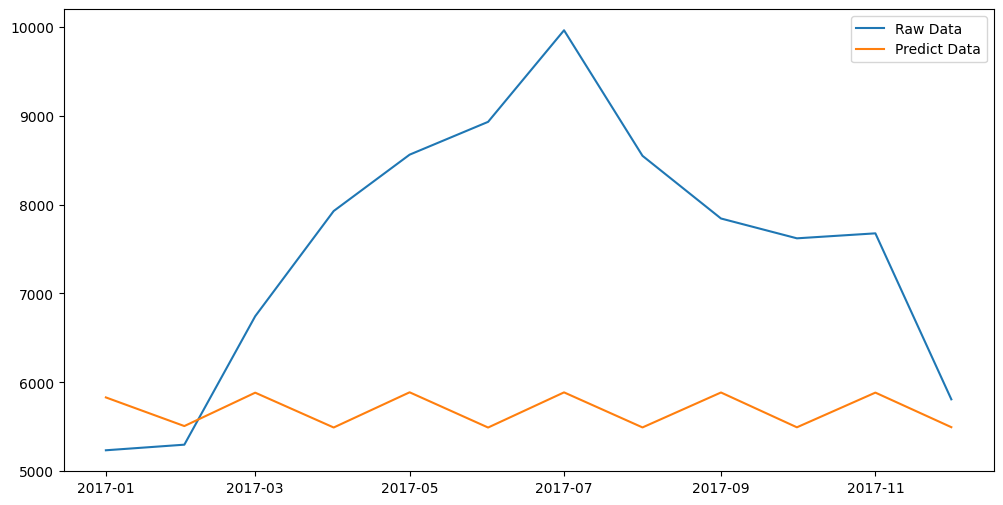

In [92]:
plt.plot(test, label='Raw Data')
plt.plot(pred_y, label='Predict Data')
plt.legend()
plt.show();

In [128]:
# 예측 성능이 낮으므로 RMSE, R2 값 확인

from sklearn.metrics import mean_squared_error, r2_score

r2 = r2_score(test, pred_y)
mse = mean_squared_error(test, pred_y)
rmse = np.sqrt(mse)

print(f'RMSE : {rmse}, R2 : {r2}')

RMSE : 2302.26085893071, R2 : -1.6430396460564052


In [94]:
# R2 값이 음수인 경우는 모델 정확도가 매우 낮은 것으로, 표본평균으로 회귀하려는 경향을 보이는 것으로 판단됨
# 계절성이 있는 경우 계절성 지수가 추가된 SARIMA 모델을 사용

### SARIMA
- ARIMA 모델에 계절성(주기에 따라 유사한 양상으로 변화하는 모양)까지 고려한 모델
- 계절성이 몇 개의 데이터 단위로 나타나는지를 확인
  - seasonal_order 4개의 매개변수 중 s 값을 먼저 찾아주는게 좋음(시각화 활용)
   - 예제의 경우 1년 단위로 계절성이 존재하므로, s=12로 설정
  - order * seasonal_order 파라미터 최적화 시 seasonal_order의 (P, D, Q)는 Grid Search로 최적화 가능
  - auto_arima를 설치하여 사용 권고 (pip install pmdarima)

In [95]:
from pmdarima import auto_arima

- Y : Date Index를 가지고 1개의 관측값으로 이루어진 DF 입력
- information_criterion : {'aic', 'aicc', 'bic', 'hqic', 'oob'}, 주로 aic를 사용하며, 최상의 모델을 찾기 위한 모델의 평가지표
- m : 계절적 차분을 위한 m은 분기별일 경우 4, 월별 데이터인 경우 12, 계절성이 없는 경우 1
- seasonal : 계절성이 존재할 경우 True, 아닐 경우 False
- start_p : AR(p)의 시작값
- max_p : AR(p)의 최댓값
- start_q : MA(q)의 시작값
- max_q : MA(q)의 최댓값
- start_P : 자동회귀 차수 P의 시작값
- max_P : 자동회귀 차수 P의 최댓값
- start_Q : 이동평균 차수 Q의 시작값
- max_Q : 이동평균 차수 Q의 최댓값

###### 계절에 대한 매개변수 : SARIMA = s, auto_arima = m

In [96]:
from pmdarima import auto_arima

auto_model = auto_arima(train_idx, start_p=0, d=1, start_q=0,
                       max_p=3, max_q=3,
                       start_P=0, start_Q=0,
                       max_P=3, max_Q=3,
                       m=12,
                       seasonal=True, information_criterion='aic',
                       trace=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=481.846, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=482.652, Time=0.11 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=482.466, Time=0.12 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=483.637, Time=0.07 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=483.669, Time=0.04 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=0.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=481.031, Time=0.03 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=482.740, Time=0.11 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.38 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=482.616, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=482.682, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=480.687, Time=0.04 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=482.403, Time=0.13 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(0,1,2)(0,1,0)[12]             : AIC=48

p=0, d=1, q=1, P=0, D=1, Q=0, m=12인 모델이 최적화 모델

In [97]:
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, [], 12)   Log Likelihood                -238.344
Date:                             Sat, 30 Mar 2024   AIC                            480.687
Time:                                     15:07:35   BIC                            483.798
Sample:                                 01-01-2013   HQIC                           481.761
                                      - 12-01-2016                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3185      0.177     -1.801      0.072      -0.665       0.028
sigma2      4.803e+04   1.64e+04      2.924      0.003    1.58e+04    8.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.15
Prob(Q):                              0.95   Prob(JB):                         0.56
Heteroskedasticity (H):               1.56   Skew:                            -0.14
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [125]:
# auto_arima 모델은 predict 함수만 존재

auto_pred_y = pd.DataFrame(auto_model.predict(n_periodes=len(test), index=test.index))
auto_pred_y.columns = ['predicted_price']
auto_pred_y

,predicted_price
2017-01-01,5609.436977
2017-02-01,5761.436977
2017-03-01,7225.436977
2017-04-01,8298.436977
2017-05-01,8841.436977
2017-06-01,9452.436977
2017-07-01,10359.436977
2017-08-01,8777.436977
2017-09-01,8068.436977
2017-10-01,7832.436977


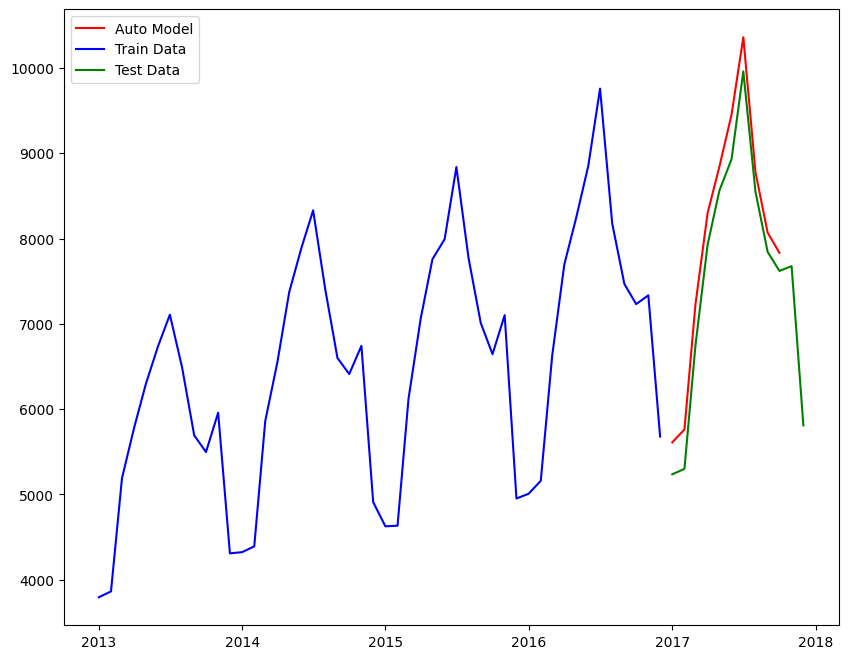

In [126]:
plt.figure(figsize=(10,8))
plt.plot(auto_pred_y, label='Auto Model', color='Red')
plt.plot(train_idx, label='Train Data', color='Blue')
plt.plot(test, label='Test Data', color='Green')
plt.legend()
plt.show();

In [129]:
mse = mean_squared_error(test[:10], auto_pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(test[:10], auto_pred_y)

print(f'R2 : {r2}, RMSE : {rmse}')

R2 : 0.933833037035262, RMSE : 371.85722286876205


- 시계열 분석에서 추세 판단 시에는 ARIMA 모델이 높을 수 있으나 계절성이 존재하는 경우 SARIMA 모델을 사용하는 것으 좋음